#Problem Description


Air pollution remains one of the world’s most pressing public-health threats, contributing to millions of premature deaths each year. Understanding and anticipating how pollution levels change across space and time is essential for issuing timely health warnings, shaping urban policy, and helping communities respond to environmental risks.

⇒ Problem Statement : Build a model that predicts future air pollution measurements as accurately as possible.

→ Models are evaluated by Root Mean Square Error (RMSE) - specifically, exp(-RMSE/100), where 100 is a scaling factor.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Data Dictionary**

*   id: Unique identifier for each observation
*   latitude: Geographic latitude coordinate
*   longitude: Geographic longitude coordinate
*   day_of_year: Day of the year (1-365, captures seasonal patterns)
*   day_of_week: Day of the week (0=Monday, 6=Sunday)
*   hour: Hour of the day (0-23, captures daily pollution cycles)
*   month: Month of the year (1-12, captures seasonal variations)
*   pollution_value: Target variable. Pollution level in the air.


In [2]:
# Importing libraries
import pandas as pd
import numpy as np

In [3]:
# Importing training set features
df_train= pd.read_csv('/content/drive/MyDrive/Data_Analysis/Air_Prediction/train.csv')
df_train.head()
#Import Test dataset
df_test= pd.read_csv('/content/drive/MyDrive/Data_Analysis/Air_Prediction/test.csv')


In [4]:
df_train.head()

,id,latitude,longitude,day_of_year,day_of_week,hour,month,pollution_value
0,0,51.491,-0.172,301,6,3,10,14.5
1,1,39.386,-121.158,254,3,21,9,34.5
2,2,51.459,0.596,301,6,3,10,10.5
3,3,35.299,-120.613,145,2,14,5,15.5
4,4,29.927,120.527,221,0,14,8,54.5


In [5]:
df_train.shape

(7649, 8)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7649 non-null   int64  
 1   latitude         7636 non-null   float64
 2   longitude        7636 non-null   float64
 3   day_of_year      7649 non-null   int64  
 4   day_of_week      7649 non-null   int64  
 5   hour             7649 non-null   int64  
 6   month            7649 non-null   int64  
 7   pollution_value  7649 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 478.2 KB


In [7]:
total_missing_values = df_train.isnull().sum()
print(f"Total number of missing values in df_train: {total_missing_values}")

Total number of missing values in df_train: id                  0
latitude           13
longitude          13
day_of_year         0
day_of_week         0
hour                0
month               0
pollution_value     0
dtype: int64


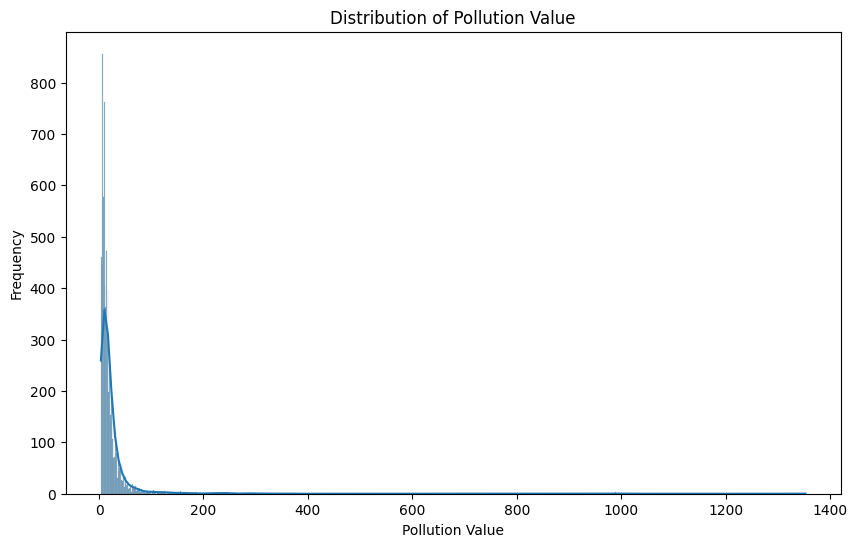

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_train['pollution_value'], kde=True)
plt.title('Distribution of Pollution Value')
plt.xlabel('Pollution Value')
plt.ylabel('Frequency')
plt.show()

**Reasoning**:
Creating cyclical features for time-based columns like 'day_of_year', 'hour', 'day_of_week', and 'month' can help the model capture the cyclical nature of these features. For example, hour 23 is closer to hour 0 than to hour 12. Using sine and cosine transformations allows the model to understand this cyclical relationship.

In [9]:
#def create_cyclical_features(df):
   # df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
  #  df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)
  #  df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
  #  df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
  #  df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
  #  df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
   # df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
  #  df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
   # return df

#df_train = create_cyclical_features(df_train)
#df_test = create_cyclical_features(df_test)

#print("DataFrame after adding cyclical features:")
#display(df_train.head())

In [10]:
# Impute missing values in latitude and longitude with the median
df_train['latitude'] = df_train['latitude'].fillna(df_train['latitude'].median())
df_train['longitude'] = df_train['longitude'].fillna(df_train['longitude'].median())

print("Missing values after imputation in df_train:")
print(df_train.isnull().sum())

Missing values after imputation in df_train:
id                 0
latitude           0
longitude          0
day_of_year        0
day_of_week        0
hour               0
month              0
pollution_value    0
dtype: int64
